In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
df = pd.read_csv("Gandum.csv", header = None,names = ["id","Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"])

In [3]:
df.info()
# Dari sini didapatkan informasi jika semua kolom bertipe numerik dan tidak ada data null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   Daerah       500 non-null    int64  
 2   SumbuUtama   500 non-null    float64
 3   SumbuKecil   500 non-null    float64
 4   Keunikan     500 non-null    float64
 5   AreaBulatan  500 non-null    int64  
 6   Diameter     500 non-null    float64
 7   KadarAir     500 non-null    float64
 8   Keliling     500 non-null    float64
 9   Bulatan      500 non-null    float64
 10  Ransum       500 non-null    float64
 11  Kelas        500 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.0 KB


In [4]:
df.head()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1


In [5]:
# NO 1

# Karena semua kolom pada tabel bersifat numerik, maka gunakan semua kolom untuk deskripsi statistik
atribut = df.drop(["id", "Kelas"], axis=1) 

st = pd.DataFrame()                                           # Data statistik
st["Mean"] = atribut.mean()                                   # Rataan
st["Median"] = atribut.median()                               # Median
st["Modus"] = atribut.mode().iloc[0]                          # Modus
st["Std"] = atribut.std(ddof=0)                               # Simpangan Baku populasi
st["Var"] = atribut.var(ddof=0)                               # Variansi populasi
st["Range"] = atribut.max() - atribut.min()                   # Jangkauan
st["Min"] = atribut.min()                                     # Nilai Minimum
st["Max"] = atribut.max()                                     # Nilai Maksimum
st["Q1"] = atribut.quantile(0.25)                             # Kuartile 1
st["Q2"] = atribut.quantile(0.5)                              # Kuartile 2
st["Q3"] = atribut.quantile(0.75)                             # Kuartile 3
st["IQR"] = atribut.quantile(0.75) - atribut.quantile(0.20)   # Interquartile range
st["Skew"] = atribut.skew()                                   # Skewness
st["Kurt"] = atribut.kurt()                                   # Kurtosis

T = st.transpose()    # Biar tampilannya bagus, ditranspose dulu
T.round(3)

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
Mean,4801.246,116.045,53.715,0.879,4937.048,77.771,0.648,281.480,0.762,2.151
Median,4735.000,115.405,53.731,0.890,4857.000,77.645,0.626,280.045,0.761,2.194
Modus,3992.000,74.133,39.907,0.720,3802.000,71.294,0.736,197.015,0.175,1.441
Std,985.409,18.264,4.067,0.037,1010.684,8.049,0.094,37.298,0.062,0.250
Var,971030.113,333.586,16.541,0.001,1021482.254,64.783,0.009,1391.144,0.004,0.062
Range,4931.000,153.795,29.071,0.194,5141.000,40.747,0.469,291.822,0.730,1.024
Min,2522.000,74.133,39.907,0.720,2579.000,56.667,0.410,197.015,0.175,1.441
Max,7453.000,227.929,68.978,0.914,7720.000,97.414,0.879,488.837,0.905,2.465
Q1,4042.750,104.116,51.194,0.864,4170.250,71.745,0.573,255.883,0.732,1.984
Q2,4735.000,115.405,53.731,0.890,4857.000,77.645,0.626,280.045,0.761,2.194


In [6]:
# Tambahan No 1
# Karena data modus ada banyak, maka tampilkan semua
atribut.mode()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
0,3992.0,74.133114,39.906517,0.719916,3802.0,71.293564,0.735849,197.015,0.174590,1.440796
1,4881.0,74.364021,41.436419,0.725553,4913.0,78.833256,0.824405,200.587,0.261297,1.453137
2,5642.0,74.691881,42.871879,0.731211,NaN,84.756224,NaN,202.456,0.299298,1.465950
3,6083.0,76.293164,43.284979,0.738639,NaN,88.006342,NaN,207.325,0.589146,1.483456
4,NaN,76.789043,44.119355,0.749282,NaN,NaN,NaN,207.697,0.603807,1.510000
...,...,...,...,...,...,...,...,...,...,...
495,NaN,152.068440,63.322854,0.913724,NaN,NaN,NaN,375.651,0.872417,2.461017
496,NaN,152.113491,63.762307,0.913760,NaN,NaN,NaN,390.125,0.874243,2.461510
497,NaN,153.583387,64.012769,0.913891,NaN,NaN,NaN,434.235,0.874743,2.463297
498,NaN,227.105462,65.738475,0.913909,NaN,NaN,NaN,448.305,0.891706,2.463546


In [7]:
# No 2
# Fungsi menampilkan histogram dan boxplot
def show_hist_box(nama_kolom):
    plt.subplot(1, 2, 1)
    df[nama_kolom].plot(kind="hist",rwidth=0.9,figsize=(9,4), bins=15)
    plt.title(nama_kolom)
    plt.xlabel("Nilai")
    plt.ylabel("Banyak")

    plt.subplot(1, 2, 2)
    df[nama_kolom].plot(kind="box", vert=False) # Biar horizontal
    plt.title(nama_kolom)
    plt.xlabel("Nilai")
    plt.yticks(ticks=[0])

    plt.tight_layout()
    plt.show()

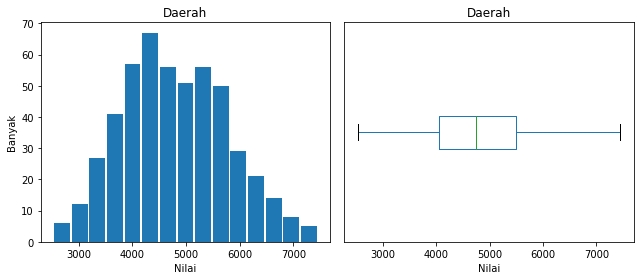

In [8]:
show_hist_box("Daerah")
# Uraian


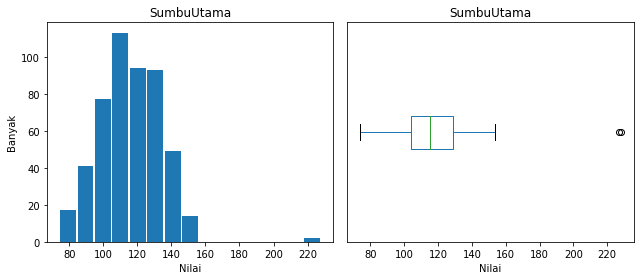

In [9]:
show_hist_box("SumbuUtama")
# Uraian


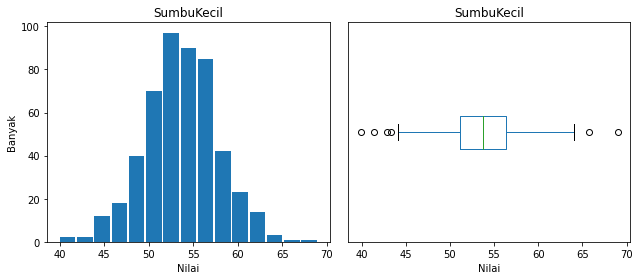

In [10]:
show_hist_box("SumbuKecil")
# Uraian


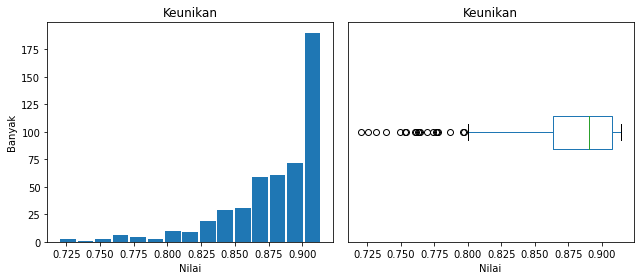

In [11]:
show_hist_box("Keunikan")
# Uraian


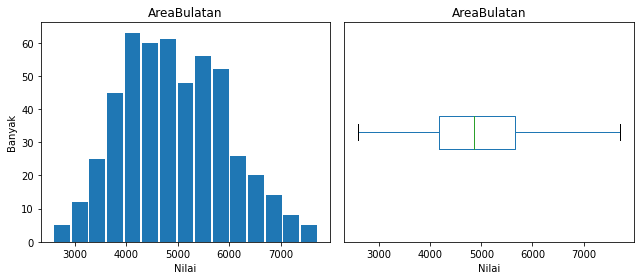

In [12]:
show_hist_box("AreaBulatan")
# Uraian


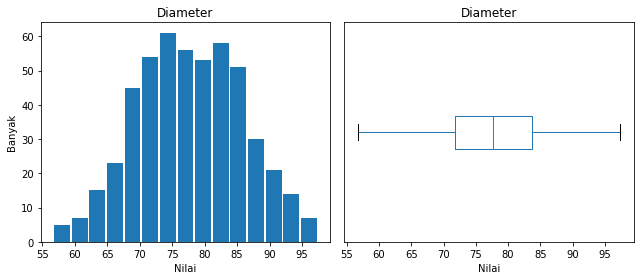

In [13]:
show_hist_box("Diameter")
# Uraian


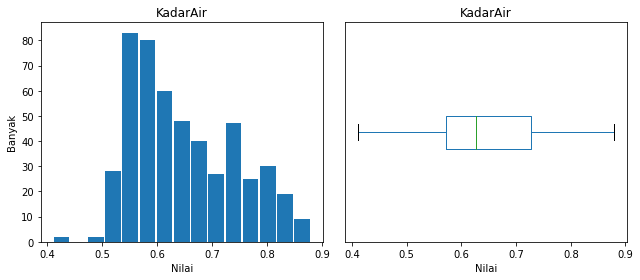

In [14]:
show_hist_box("KadarAir")
# Uraian


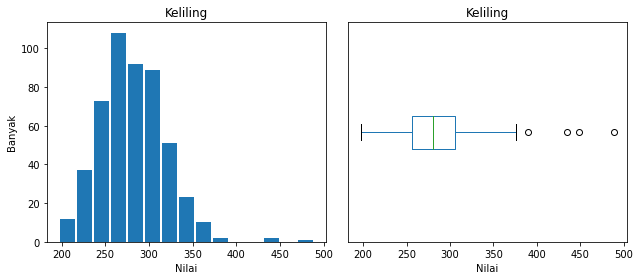

In [15]:
show_hist_box("Keliling")
# Uraian


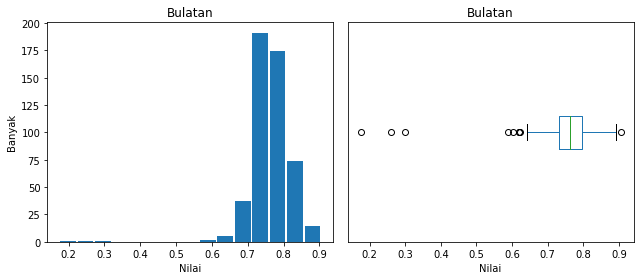

In [16]:
show_hist_box("Bulatan")
# Uraian


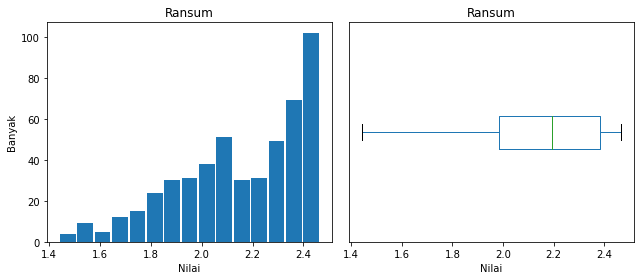

In [17]:
show_hist_box("Ransum")
# Uraian


In [18]:
# NO 3
# Fungsi untuk menentukan apakah suatu kolom numerik berdistribusi normal
def test_norm_dist(nama_kolom):
    alpha = 0.05
    print("Menggunakan D’Agostino’s K-squared Test")
    stat, p_value = stats.normaltest(df[nama_kolom])
    # print("Menggunakan Shapiro-Wilk Test")
    # stat, p_value = stats.shapiro(df[nama_kolom])
    print("alpha   = %.4f" %(alpha))
    print("p_value = %.4f" %(p_value))
    print("Hasil :")
    if (p_value > alpha):
        print("Kolom %s Berdistribusi Normal" %(nama_kolom))
    else:
        print("Kolom %s Tidak Berdistribusi Normal" %(nama_kolom))

    plt.subplots()
    df[nama_kolom].plot.hist(density="True",rwidth=0.90, color="lightskyblue",bins=15)
    df[nama_kolom].plot.kde(color="tab:blue")
    plt.title(nama_kolom)
    plt.xlabel("Nilai")

    plt.show()



Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0044
Hasil :
Kolom Daerah Tidak Berdistribusi Normal


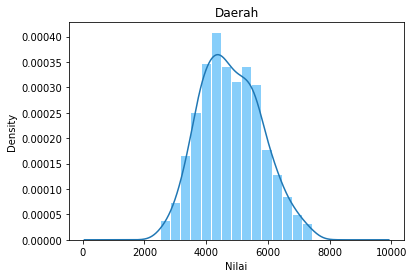

In [19]:
test_norm_dist("Daerah")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom SumbuUtama Tidak Berdistribusi Normal


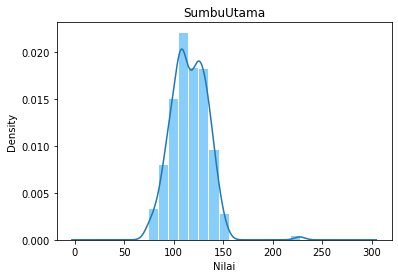

In [20]:
test_norm_dist("SumbuUtama")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.1574
Hasil :
Kolom SumbuKecil Berdistribusi Normal


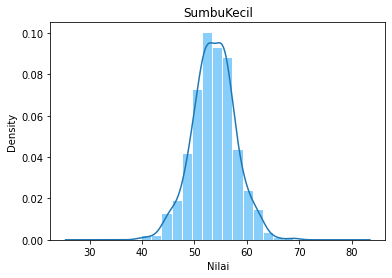

In [21]:
test_norm_dist("SumbuKecil")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom Keunikan Tidak Berdistribusi Normal


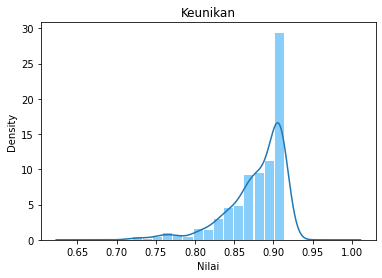

In [22]:
test_norm_dist("Keunikan")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0047
Hasil :
Kolom AreaBulatan Tidak Berdistribusi Normal


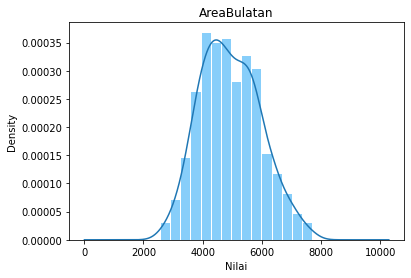

In [23]:
test_norm_dist("AreaBulatan")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0242
Hasil :
Kolom Diameter Tidak Berdistribusi Normal


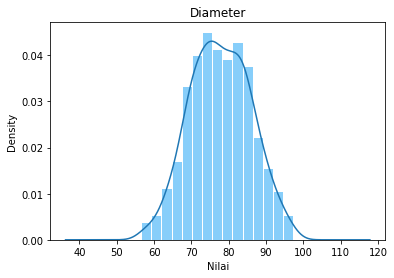

In [24]:
test_norm_dist("Diameter")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom KadarAir Tidak Berdistribusi Normal


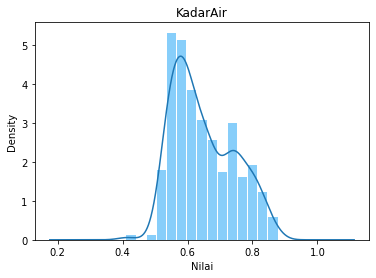

In [25]:
test_norm_dist("KadarAir")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom Keliling Tidak Berdistribusi Normal


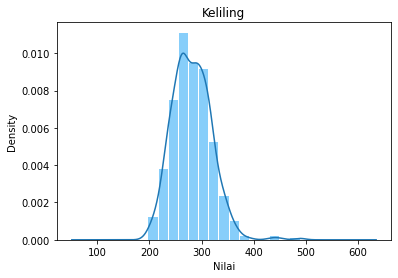

In [26]:
test_norm_dist("Keliling")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom Bulatan Tidak Berdistribusi Normal


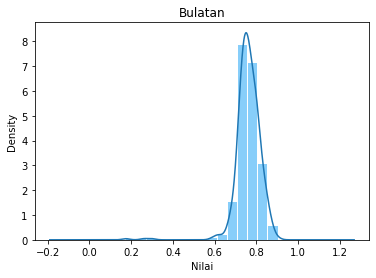

In [27]:
test_norm_dist("Bulatan")

Menggunakan D’Agostino’s K-squared Test
alpha   = 0.0500
p_value = 0.0000
Hasil :
Kolom Ransum Tidak Berdistribusi Normal


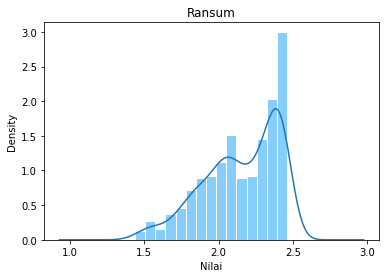

In [28]:
test_norm_dist("Ransum")

In [29]:
# NO 4
# Diasumsikan bahwa populasi berdistribusi normal, variansi populasi tidak diketahui
# Selalu diambil 60% sample dari populasi

No 4a
Nilai rata-rata Daerah di atas 4700?
Langkah Uji Hipotesis
1. H0 : mu = 4700
2. H1 : mu > 4700
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi z, std populasi diketahui
 - Daerah kritis t > 1.644854
5. Hitung nilai uji statistik dan Hitung p_value
 - z = 0.985366
 - p-value = 0.162222
6. Test Daerah Kritis dan Test P-Value

Daerah kritis : z > 1.6449
z = 0.9854
H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
alpha   = 0.0500
p-value = 0.162222
H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, TIDAK BENAR jika nilai rata-rata Daerah di atas 4700

Visualisasi Boxplot


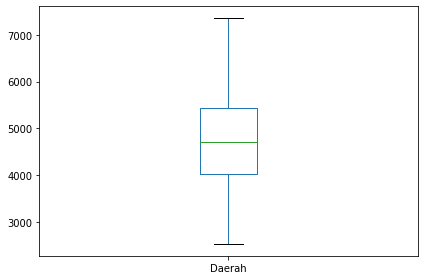

In [30]:
print("No 4a")
print("Nilai rata-rata Daerah di atas 4700?")
# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : mu = 4700
print("1. H0 : mu = 4700")
#2 H1 : mu > 4700
print("2. H1 : mu > 4700")
mu = 4700
sample = df.sample(frac=0.6)        # ambil 60% populasi
n = sample.shape[0]                 # banyak sample
x_bar = sample["Daerah"].mean()     # rataan sample
std = df["Daerah"].std(ddof=0)      # std populasi

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi z, std populasi diketahui")
# Uji statistik menggunakan Z-Test
# Daerah kritis, z > z_alpha
z_alpha = stats.norm.ppf(1-alpha)   # titik kritis
print(" - Daerah kritis t > %f" %(z_alpha))


#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
z = (x_bar - mu)/(std/math.sqrt(n))
p_value = 1 - stats.norm.cdf(z)     
print(" - z = %f" %(z))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : z > %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z > z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika nilai rata-rata Daerah di atas 4700")
else:
    print("Jadi, TIDAK BENAR jika nilai rata-rata Daerah di atas 4700")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
sample["Daerah"].plot(kind="box")
plt.tight_layout()
plt.show()

In [31]:
# NO 4b
print("Nilai Rata-rata Sumbu Utama tidak sama dengan 116?")
print("Langkah Uji Hipotesis")
# Langkah Uji Hipotesis
#1 H0 : mu = 116
print("1. H0 : mu = 116")
#2 H1 : mu != 116
print("2. H1 : mu != 116")
mu = 116
n = df.shape[0]

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi t, std populasi tidak diketahui")
# Daerah kritis, t < -t_alpha/2 atau t > t_alpha/2
v = n - 1                       # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)   # titik kritis
print(" - Daerah kritis t < -%f atau t > %f" %(t_alpha, t_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
t, p_value = stats.ttest_1samp(df["SumbuUtama"], mu)
p_value = p_value/2     # Bagi 2 karena yang direturn adalah p-value untuk 2 tail
print(" - t = %f" %(t))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : t < -%.4f atau t > %.4f" %(t_alpha,t_alpha))
print("t = %.4f" %(t))
if (t < -t_alpha or t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR ")
else:
    print("Jadi, TIDAK BENAR ")


Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
Langkah Uji Hipotesis
1. H0 : mu = 116
2. H1 : mu != 116
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi t, std populasi tidak diketahui
 - Daerah kritis t < -1.964729 atau t > 1.964729
5. Hitung nilai uji statistik dan Hitung p_value
 - t = 0.055247
 - p-value = 0.477982
6. Test Daerah Kritis dan Test P-Value

Daerah kritis : t < -1.9647 atau t > 1.9647
t = 0.0552
H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
alpha   = 0.0500
p-value = 0.477982
H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, TIDAK BENAR 


Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
Langkah Uji Hipotesis
1. H0 : mu = 50
2. H1 : mu != 50
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi z, std populasi diketahui
 - Daerah kritis z < -1.959964 atau z > 1.959964
5. Hitung nilai uji statistik dan Hitung p_value
 - z = 5.374122
 - p-value = 0.000000
6. Test Daerah Kritis dan Test P-Value

Daerah kritis : z < -1.9600 atau z > 1.9600
z = 5.3741
H0 DITOLAK karena nilai uji terletak di daerah kritis
alpha   = 0.0500
p-value = 0.000000
H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, BENAR jika nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50

Visualisasi Boxplot


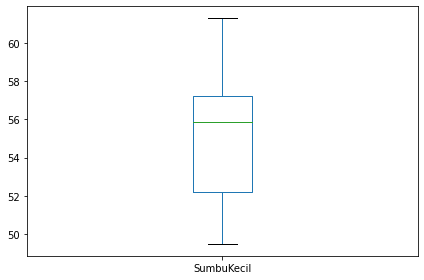

In [32]:
# NO 4c
print("Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?")
print("Langkah Uji Hipotesis")
# Langkah Uji Hipotesis
#1 H0 : mu = 50
print("1. H0 : mu = 50")
#2 H1 : mu != 50
print("2. H1 : mu != 50")
mu = 50
n = 20
sample = df.head(n)
x_bar = sample["SumbuKecil"].mean()     # rataan sample
std = df["SumbuKecil"].std(ddof=0)      # std populasi

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi z, std populasi diketahui")
# Daerah kritis, z < -z_alpha/2 atau z > z_alpha/2
z_alpha = stats.norm.ppf(1-alpha/2)   # titik kritis
print(" - Daerah kritis z < %f atau z > %f" %(-z_alpha, z_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
z = (x_bar - mu)/(std/math.sqrt(n))
p_value = 1 - stats.norm.cdf(z)  

print(" - z = %f" %(z))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : z < %.4f atau z > %.4f" %(-z_alpha,z_alpha))
print("z = %.4f" %(z))
if (z < -z_alpha or z > z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50")
else:
    print("Jadi, TIDAK BENAR jika nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
sample["SumbuKecil"].plot(kind="box")
plt.tight_layout()
plt.show()

In [33]:
# No 4d
print("Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?")
# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : p = 0.15
print("1. H0 : p = 0.15")
#2 H1 : p != 0.15
print("2. H1 : p != 0.15")
p = 0.05
n = df.shape[0] # Jumlah data
x = df.loc[df["Diameter"] > 100].count()["Diameter"]

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik Binomial didekati Normal")
# Daerah kritis, t < -t_alpha/2 atau t > t_alpha/2
v = n - 1                       # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)   # titik kritis
print(" - Daerah kritis t < -%f atau t > %f" %(t_alpha, t_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
z = (x-n*p)/math.sqrt(n*p*(1-p))
# p-value
p_value = stats.norm.cdf(z)
print(" - z = %f" %(z))
print(" - p-value = %.8f" %(p_value))
#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : z < %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z < z_alpha):
    tolak = True
    print("H0 DITOLAK ")
else:
    print("H0 TIDAK DITOLAK ")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %.8f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
# Kesimpulan
if (tolak):
    print("Jadi, BENAR ")
else:
    print("Jadi, TIDAK BENAR")



Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
Langkah Uji Hipotesis
1. H0 : p = 0.15
2. H1 : p != 0.15
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik Binomial didekati Normal
 - Daerah kritis t < -1.964729 atau t > 1.964729
5. Hitung nilai uji statistik dan Hitung p_value
 - z = -5.129892
 - p-value = 0.00000014
6. Test Daerah Kritis dan Test P-Value

Daerah kritis : z < 1.9600
z = -5.1299
H0 DITOLAK 
alpha   = 0.0500
p-value = 0.00000014
H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, BENAR 


Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%
Langkah Uji Hipotesis
1. H0 : p = 0.05
2. H1 : p < 0.05
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik Binomial didekati Normal
 - Daerah kritis z < -1.644854
5. Hitung nilai uji statistik dan Hitung p_value
 - z = -5.129892
 - p-value = 0.00000014
6. Test Daerah Kritis dan Test P-Value

Daerah kritis : z < -1.6449
z = -5.1299
H0 DITOLAK karena nilai uji terletak di daerah kritis
alpha   = 0.0500
p-value = 0.00000014
H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%

Visualisasi Boxplot


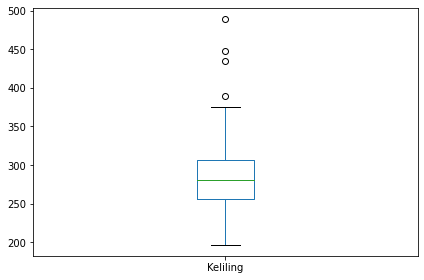

In [34]:
# No 4e
print("Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")
# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : p = 0.05
print("1. H0 : p = 0.05")
#2 H1 : p < 0.05
print("2. H1 : p < 0.05")
p = 0.05
n = df.shape[0] # Jumlah data
x = df.loc[df["Keliling"] < 100].count()["Keliling"]

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik Binomial didekati Normal")
# Daerah kritis, z < -z_alpha
z_alpha = -stats.norm.ppf(1-alpha)   # titik kritis
print(" - Daerah kritis z < %f" %(z_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
z = (x-n*p)/math.sqrt(n*p*(1-p))
# p-value
p_value = stats.norm.cdf(z)
print(" - z = %f" %(z))
print(" - p-value = %.8f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : z < %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z < z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %.8f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
# Kesimpulan
if (tolak):
    print("Jadi, BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")
else:
    print("Jadi, TIDAK BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
df["Keliling"].plot(kind="box")
plt.tight_layout()
plt.show()

In [35]:
# No 5a
print("Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?")

# Diketahui:
n = df.shape[0] # Jumlah data
n1 = n/2
n2 = n/2
first_half = df.loc[:n1-1]
second_half = df.loc[n1:]
x1 = first_half["AreaBulatan"].mean()
x2 = second_half["AreaBulatan"].mean()
std1 = first_half["AreaBulatan"].std()
std2 = second_half["AreaBulatan"].std()
sp = math.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2))/(n1 + n2 - 2))

# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : mu1 - mu2 = 0.2
print("1. H0 : mu1 - mu2 = 0")
#2 H1 : mu1 - mu2 > 0.2
print("2. H1 : mu1 - mu2 > 0")
d0 = 0

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05
#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi t untuk 2 sampel, std populasi tidak diketahui dan diasumsikan sama")
# Uji statistik menggunakan T-Test untuk dua sampel
# Daerah kritis, t > t_alpha
v = n1 + n2 - 2                         # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)      # titik kritis
print(" - Daerah kritis t > %f" %(t_alpha))


#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
t = ((x1-x2)-d0)/(sp*math.sqrt(1/n1 + 1/n2))
# p-value
p_value = 1 - stats.t.cdf(t,v)
print(" - t = %f" %(t))
print(" - p-value = %f" %(p_value))


#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis t > %.4f" %(t_alpha))
print("t = %.4f" %(t))
if (t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR ")
else:
    print("Jadi, TIDAK BENAR")




Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
Langkah Uji Hipotesis
1. H0 : mu1 - mu2 = 0
2. H1 : mu1 - mu2 > 0
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi t untuk 2 sampel, std populasi tidak diketahui dan diasumsikan sama
 - Daerah kritis t > 1.964739
5. Hitung nilai uji statistik dan Hitung p_value
 - t = 17.013037
 - p-value = 0.000000
6. Test Daerah Kritis dan Test P-Value

Daerah kritis t > 1.9647
t = 17.0130
H0 DITOLAK karena nilai uji terletak di daerah kritis
alpha   = 0.0500
p-value = 0.000000
H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, BENAR 


Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
Langkah Uji Hipotesis
1. H0 : mu1 - mu2 = 0.2
2. H1 : mu1 - mu2 > 0.2
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi z untuk 2 sampel, std populasi diketahui
 - Daerah kritis z > 1.644854
5. Hitung nilai uji statistik dan Hitung p_value
 - z = -21.343229
 - p-value = 1.000000
6. Test Daerah Kritis dan Test P-Value

Daerah kritis z > 1.6449
z = -21.3432
H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
alpha   = 0.0500
p-value = 1.000000
H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, TIDAK BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2

Visualisasi Boxplot


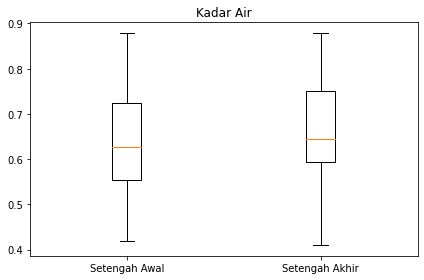

In [42]:
# No 5b
print("Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?")
# Simpangan baku populasi sama dan tidak diketahui

# Diketahui:
n = df.shape[0] # Jumlah data
first_half = df.loc[:250-1]
second_half = df.loc[250:]
sample_first_half = first_half.sample(frac=0.6)      # Ambil 60% sample bagian awal
sample_second_half = second_half.sample(frac=0.6)   # Ambil 60% sample bagian akhir
# Ukuran sample
n1 = sample_first_half.shape[0]     
n2 = sample_second_half.shape[0]    
# rataan sample
x1 = sample_first_half["KadarAir"].mean()
x2 = sample_second_half["KadarAir"].mean()
std1_pop = first_half["KadarAir"].std(ddof=0)
std2_pop = second_half["KadarAir"].std(ddof=0)
# sp = math.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2))/(n1 + n2 - 2))

# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : mu1 - mu2 = 0.2
print("1. H0 : mu1 - mu2 = 0.2")
#2 H1 : mu1 - mu2 > 0.2
print("2. H1 : mu1 - mu2 > 0.2")
d0 = 0.2

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi z untuk 2 sampel, std populasi diketahui")
# Uji statistik menggunakan Z-Test untuk dua sampel
# Daerah kritis, z > z_alpha
z_alpha = stats.norm.ppf(1-alpha)      # titik kritis
print(" - Daerah kritis z > %f" %(z_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
z = ((x1 - x2) - d0)/math.sqrt(std1_pop**2/n1 + std2_pop**2/n2)
# p-value
p_value = 1 - stats.norm.cdf(z)
print(" - z = %f" %(z))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis z > %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z > z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2")
else:
    print("Jadi, TIDAK BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
plt.boxplot([sample_first_half["KadarAir"], sample_second_half["KadarAir"]])
plt.xticks(ticks=[1,2],labels=["Setengah Awal","Setengah Akhir"])
plt.title("Kadar Air")
plt.tight_layout()
plt.show()


In [430]:
# No 5c
print("Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?")


# Diketahui:
n = 20 # Jumlah data
n1 = n
n2 = n
first_half = df.head(n1)
second_half = df.tail(n2)
x1 = first_half["Bulatan"].mean()
x2 = second_half["Bulatan"].mean()
std1 = first_half["Bulatan"].std()
std2 = second_half["Bulatan"].std()
sp = math.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2))/(n1 + n2 - 2))

# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : mu1 - mu2 = 0
print("1. H0 : mu1 - mu2 = 0")
#2 H1 : mu1 - mu2 > 0
print("2. H1 : mu1 - mu2 != 0")
d0 = 0.2

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05


print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi t untuk 2 sampel, std populasi tidak diketahui dan diasumsikan sama")
# Uji statistik menggunakan T-Test untuk dua sampel
# Daerah kritis, t > t_alpha
v = n1 + n2 - 2                         # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)      # titik kritis
print(" - Daerah kritis t > %f" %(t_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
t = ((x1-x2)-d0)/(sp*math.sqrt(1/n1 + 1/n2))
# p-value
p_value = 1 - stats.t.cdf(t,v)
print(" - t = %f" %(t))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis t > %.4f" %(t_alpha))
print("t = %.4f" %(t))
if (t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR ")
else:
    print("Jadi, TIDAK BENAR ")


Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
Langkah Uji Hipotesis
1. H0 : mu1 - mu2 = 0
2. H1 : mu1 - mu2 != 0
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi t untuk 2 sampel, std populasi tidak diketahui dan diasumsikan sama
 - Daerah kritis t > 2.024394
5. Hitung nilai uji statistik dan Hitung p_value
 - t = -26.068438
 - p-value = 1.000000
6. Test Daerah Kritis dan Test P-Value

Daerah kritis t > 2.0244
t = -26.0684
H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
alpha   = 0.0500
p-value = 1.000000
H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, TIDAK BENAR 


Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
Langkah Uji Hipotesis
1. H0 : p1 - p2 = 0
2. H1 : p1 - p2 > 0
3. alpha = 0.05
4. Uji statistik dan Daerah kritis
 - Menggunakan uji statistik distribusi normal untuk 2 sampel
 - Daerah kritis z > 1.644854
5. Hitung nilai uji statistik dan Hitung p_value
 - z = 4.601914
 - p-value = 0.000002
6. Test Daerah Kritis dan Test P-Value

Daerah kritis z > 1.6449
z = 4.6019
H0 DITOLAK karena nilai uji terletak di daerah kritis
alpha   = 0.0500
p-value = 0.000002
H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, BENAR jika nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum

Visualisasi Boxplot


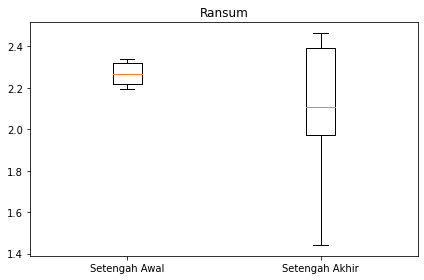

In [46]:
# No 5d
# Asumsi nilai bagian awal adalah setengah data awal dan nilai bagian akhir adalah setengah data akhir
print("Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?")

# Diketahui:
n = df.shape[0] # Jumlah data

first_half = df.loc[:n1-1].sample(frac=0.6)     # Ambil 60% sample
second_half = df.loc[n1:].sample(frac=0.6)      # Ambil 60% sample

# Ukuran sample
n1 = first_half.shape[0]     
n2 = second_half.shape[0] 

x1 = first_half.loc[first_half["Ransum"] > 2].count()["Ransum"]
x2 = second_half.loc[second_half["Ransum"] > 2].count()["Ransum"]
p1_hat = x1/n1
p2_hat = x2/n2
p_hat = (x1+x2)/(n1+n2)
q_hat = 1 - p_hat

# Langkah Uji Hipotesis
print("Langkah Uji Hipotesis")
#1 H0 : p1 - p2 = 0
print("1. H0 : p1 - p2 = 0")
#2 H1 : p1 - p2 > 0
print("2. H1 : p1 - p2 > 0")

#3 Tingkat signifikan
print("3. alpha = 0.05")
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
print("4. Uji statistik dan Daerah kritis")
print(" - Menggunakan uji statistik distribusi normal untuk 2 sampel")
# Uji statistik menggunakan Distribusi Normal z
# Daerah kritis, z > z_alpha
z_alpha = stats.norm.ppf(1-alpha)
print(" - Daerah kritis z > %f" %(z_alpha))

#5 Hitung nilai uji statistik dan hitung p_value
print("5. Hitung nilai uji statistik dan Hitung p_value")
# Nilai uji statistik
z = (p1_hat - p2_hat)/math.sqrt(p_hat*q_hat*(1/n1 + 1/n2))
# p-value
p_value = 1 - stats.norm.cdf(z)
print(" - z = %f" %(z))
print(" - p-value = %f" %(p_value))

#6 Ambil keputusan
print("6. Test Daerah Kritis dan Test P-Value\n")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis z > %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z > z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum")
else:
    print("Jadi, TIDAK BENAR jika nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
plt.boxplot([first_half["Ransum"], second_half["Ransum"]])
plt.xticks(ticks=[1,2],labels=["Setengah Awal","Setengah Akhir"])
plt.title("Ransum")
plt.tight_layout()
plt.show()



In [432]:
#5e #masi ngga ngerti ini coba - coba aja
print("Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?")
# Diketahui:


n = df.shape[0] # Jumlah data
n1 = n/2
n2 = n/2

